## Créer et visualiser un circuit

### Création

Version intermédiaire

In [42]:
from qiskit import QuantumCircuit

circuit = QuantumCircuit(2)
circuit.h(0)
circuit.x(1)
circuit.cx(0, 1)
circuit.measure_all()

Version de fin de vidéo

In [47]:
circuit = QuantumCircuit(2)
circuit.h(0)
circuit.h(1)
circuit.measure_all()

### Visualisation

#### ASCII art

In [43]:
circuit.draw()

┌───┐      ░ ┌─┐   
   q_0: ┤ H ├──■───░─┤M├───
        ├───┤┌─┴─┐ ░ └╥┘┌─┐
   q_1: ┤ X ├┤ X ├─░──╫─┤M├
        └───┘└───┘ ░  ║ └╥┘
meas: 2/══════════════╩══╩═
                      0  1

#### MatPlotLib

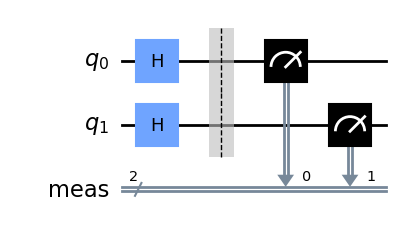

In [48]:
circuit.draw('mpl')

### Simulation

#### Création du simulateur

In [38]:
from qiskit import BasicAer

simulator = BasicAer.get_backend('qasm_simulator')

#### Compilation / lancement
Compilation du circuit et lancement de la simulation.

In [49]:
from qiskit import transpile

compiled = transpile(circuit, simulator)
job = simulator.run(compiled, shots = 1024)

#### Résultats

In [ ]:
counts = job.result().get_counts(compiled)
counts

In [ ]:
from qiskit.visualization import plot_histogram

plot_histogram(counts)